# サポートベクトル回帰(SVR)

## ライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## データセットのインポート

In [3]:
dataset = pd.read_csv('svr.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [3]
 [3]
 [4]
 [4]
 [4]
 [5]
 [5]
 [5]
 [5]]


In [5]:
print(y)

[2 3 4 5 3 4 5 4 5 4 5 6 4 5 6 7]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[2]
 [3]
 [4]
 [5]
 [3]
 [4]
 [5]
 [4]
 [5]
 [4]
 [5]
 [6]
 [4]
 [5]
 [6]
 [7]]


## フィーチャースケーリング

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.29777137]
 [-1.29777137]
 [-1.29777137]
 [-1.29777137]
 [-0.64888568]
 [-0.64888568]
 [-0.64888568]
 [ 0.        ]
 [ 0.        ]
 [ 0.64888568]
 [ 0.64888568]
 [ 0.64888568]
 [ 1.29777137]
 [ 1.29777137]
 [ 1.29777137]
 [ 1.29777137]]


In [10]:
print(y)

[[-2.04124145]
 [-1.22474487]
 [-0.40824829]
 [ 0.40824829]
 [-1.22474487]
 [-0.40824829]
 [ 0.40824829]
 [-0.40824829]
 [ 0.40824829]
 [-0.40824829]
 [ 0.40824829]
 [ 1.22474487]
 [-0.40824829]
 [ 0.40824829]
 [ 1.22474487]
 [ 2.04124145]]


## データセットを使ったモデルの訓練

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear', epsilon=0.5) # イプシロン
regressor.fit(X, y)

"""
インプシロンとは
- 誤差を許容するマージンの幅
- 予測値と実際の値の誤差が ε以内であればペナルティを課さない というルール
- 通常の回帰では、予測値と実際の値の誤差を最小化することを目的とします。しかし、SVRでは ある程度の誤差（ε以内）は重要ではない とみなし、それ以上の誤差だけを最適化するという考え方を取ります。
"""

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(epsilon=0.5, kernel='linear')

## 結果の可視化

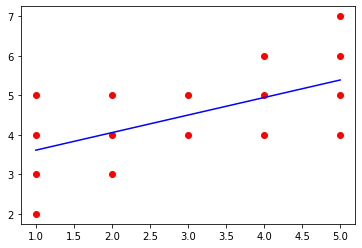

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X).reshape(-1,1), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.show()